###### Посчитать tpr и fpr в ноутбуке с лекции. 
###### Убедиться, что график ROC AUC получается таким же, как и штатными средствами

###### Потроить график Precision - Recall на этих же данных

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

In [42]:
df = pd.read_csv('adult.csv')


In [43]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


###### Пропущенные значения обозначены вопросами - надо заменить их на null

In [45]:
df.replace(['?'], [None], inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


###### Удалим все строки с пустыми ячейками 

In [47]:
df.dropna(inplace=True)

In [48]:
df.reset_index(inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            45222 non-null  int64 
 1   age              45222 non-null  int64 
 2   workclass        45222 non-null  object
 3   fnlwgt           45222 non-null  int64 
 4   education        45222 non-null  object
 5   educational-num  45222 non-null  int64 
 6   marital-status   45222 non-null  object
 7   occupation       45222 non-null  object
 8   relationship     45222 non-null  object
 9   race             45222 non-null  object
 10  gender           45222 non-null  object
 11  capital-gain     45222 non-null  int64 
 12  capital-loss     45222 non-null  int64 
 13  hours-per-week   45222 non-null  int64 
 14  native-country   45222 non-null  object
 15  income           45222 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [50]:
df.describe()

,index,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,24433.151563,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,14092.966862,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,0.000000,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,12206.250000,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,24470.000000,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,36629.750000,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,48841.000000,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [51]:
df.head(8)

,index,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
5,7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
6,8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
7,9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


##### Разобьём данные на X и Y 

In [52]:
X = df.loc[:, df.columns != 'income']

In [53]:
y = df[df.columns[-1]]

In [54]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [55]:
# Заменим в целевом атрибуте '>50K' на 1 и '<=50K' на 0

y.replace('>50K', 1, inplace=True)
y.replace('<=50K', 0, inplace=True)

In [56]:
# Разделим выборку на тренировочную и валидационную

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)

In [57]:
# Разделим признаки на числовые и категориальные
num_columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
cat_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

In [58]:
# Получим список значений для всех категорий, для OneHotEncoder-а
def get_cat_categories(df, cat_columns):
    categories = []
    for column in cat_columns:
        categories.append(list(df[column].unique()))    
    return categories

In [59]:
categories = get_cat_categories(df, cat_columns)

In [60]:
# Категориальные признаки обрабатываем OneHotEncoder-ом, численные пропускаем через StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(categories=categories), cat_columns),
        ('num', StandardScaler(), num_columns)
    ],
    sparse_threshold=0,
    remainder='drop'
)

In [61]:
# Соберем несколько моделей с разными параметрами и вычислим predict_proba для тестовой выборки
results = {}


In [62]:
penalty = 'l1'
for c in np.logspace(-3, 3, 7):
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', LogisticRegression(penalty=penalty, C=c, solver='liblinear'))])
    clf.fit(X_train, y_train)
    y_prob = clf.predict_proba(X_val)[:, 1]
    results[(penalty, c)] = y_prob

In [63]:
penalty = 'l2'
for c in np.logspace(-3, 3, 7):
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', LogisticRegression(penalty=penalty, C=c, solver='liblinear'))])
    clf.fit(X_train, y_train)
    y_prob = clf.predict_proba(X_val)[:, 1]
    results[(penalty, c)] = y_prob

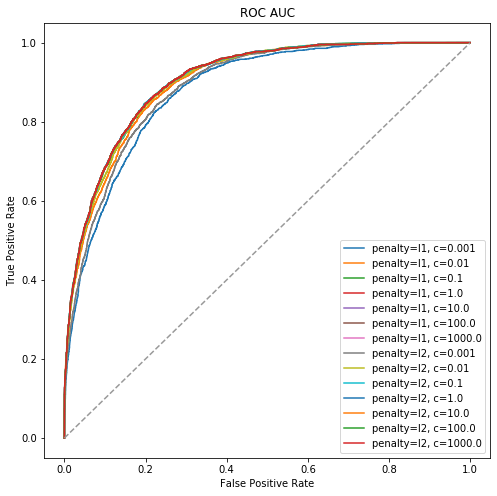

In [64]:
# Построим ROC AUC

plt.figure(figsize=(8, 8))
for (penalty, c), proba in results.items():
    fpr, tpr, _ = roc_curve(y_val, proba)
    plt.plot(fpr, tpr, label=f'penalty={penalty}, c={c}')
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC')
plt.legend(loc='lower right')
plt.show()

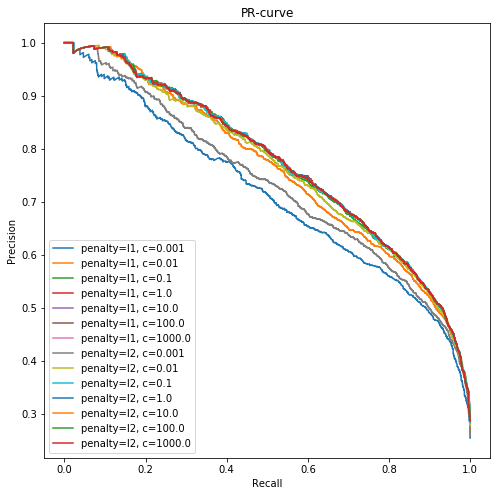

In [65]:
# Построим PR-curve
plt.figure(figsize=(8, 8))
for (penalty, c), proba in results.items():
    precision, recall, _ = precision_recall_curve(y_val, proba)
    plt.plot(recall, precision, label=f'penalty={penalty}, c={c}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-curve')
plt.legend(loc='lower left')
plt.show()